<a href="https://colab.research.google.com/github/Vardhan77/DeepLearningWithEVA/blob/master/Project4/s04e00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VANILLA NETWORK :


**NO** BN,**NO**  DropOut.

Fixed batch size 128.

Fixed learning rate scheduler. 

Adam as Optimizer.


Observation:
 Accuracy drops to 98.69%
 



# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras 

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist #The Avengers Assemble

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Loadin the data from mnist folder into a dataframe of training and test images.

(60000, 28, 28)


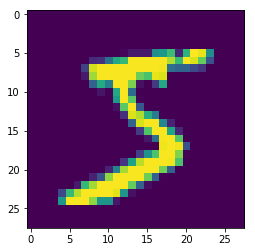

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(18, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(16, 3, 3, activation='relu')) #24

model.add(Convolution2D(18, 3, 3, activation='relu')) #22

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Convolution2D(14, 3, 3, activation='relu')) #9

model.add(Convolution2D(16, 3, 3, activation='relu')) #7

model.add(Convolution2D(16, 3, 3, activation='relu')) #5

model.add(Convolution2D(10, 1, 1)) #5

model.add(Convolution2D(10, 5)) 

model.add(Flatten())
model.add(Activation('softmax'))

W0623 09:24:23.536527 140412602259328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(18, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0623 09:24:23.560857 140412602259328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 09:24:23.563865 140412602259328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2608      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 18)        2610      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 18)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 14)          2282      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          2032      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 16)          2320      
__________

In [12]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1)

W0623 09:24:23.716971 140412602259328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 09:24:23.725743 140412602259328 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys
W0623 09:24:23.822591 140412602259328 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 09:24:23.907830 140412602259328

Epoch 1/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.2306 - acc: 0.9263
Epoch 2/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0682 - acc: 0.9785
Epoch 3/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0520 - acc: 0.9839
Epoch 4/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0433 - acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0383 - acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0367 - acc: 0.9882
Epoch 7/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0321 - acc: 0.9896
Epoch 8/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0300 - acc: 0.9907
Epoch 9/10
60000/60000 [==============================] - 4s 61us/step - loss: 0.0279 - acc: 0.9914
Epoch 10/10
60000/60000 [==============================] - 4s 62us/step - loss: 0.0272 - acc: 0.991

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [14]:
print(score)

[0.04209984207014786, 0.9869]


In [0]:
y_pred = model.predict(X_test)

In [16]:
print(y_pred[:9])
print(y_test[:9])

[[6.10617633e-12 3.46419338e-10 3.20242250e-08 1.16102974e-07
  6.88659199e-12 1.28571945e-10 2.05078548e-16 9.99999881e-01
  5.64963874e-12 1.38114880e-08]
 [4.20283686e-05 2.06345953e-06 9.99955058e-01 3.94773592e-09
  6.67689182e-10 4.35812844e-08 6.13502152e-07 3.05474472e-08
  8.11596124e-08 7.04570213e-12]
 [3.64051150e-10 9.99984622e-01 1.61231782e-07 6.98954317e-09
  5.77048831e-06 8.21716731e-06 1.80245738e-08 1.19949618e-06
  1.62486931e-08 1.06455298e-08]
 [9.99992013e-01 1.38642386e-09 2.30497199e-09 2.20874830e-09
  3.40492470e-08 1.18234755e-06 9.76916454e-07 3.57307613e-07
  4.49003457e-09 5.48457729e-06]
 [4.95196995e-09 1.37489464e-09 6.70223599e-10 4.12691886e-12
  9.99999523e-01 6.51082183e-12 8.10748730e-08 4.85107110e-09
  3.71909881e-12 2.98509491e-07]
 [1.78276179e-11 9.99992847e-01 8.17622734e-08 3.52149643e-09
  1.10217718e-06 2.15075465e-06 1.75872361e-09 3.75067543e-06
  1.64909819e-09 8.61731930e-09]
 [2.03480968e-10 9.09138089e-06 1.08595975e-06 4.75936268e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

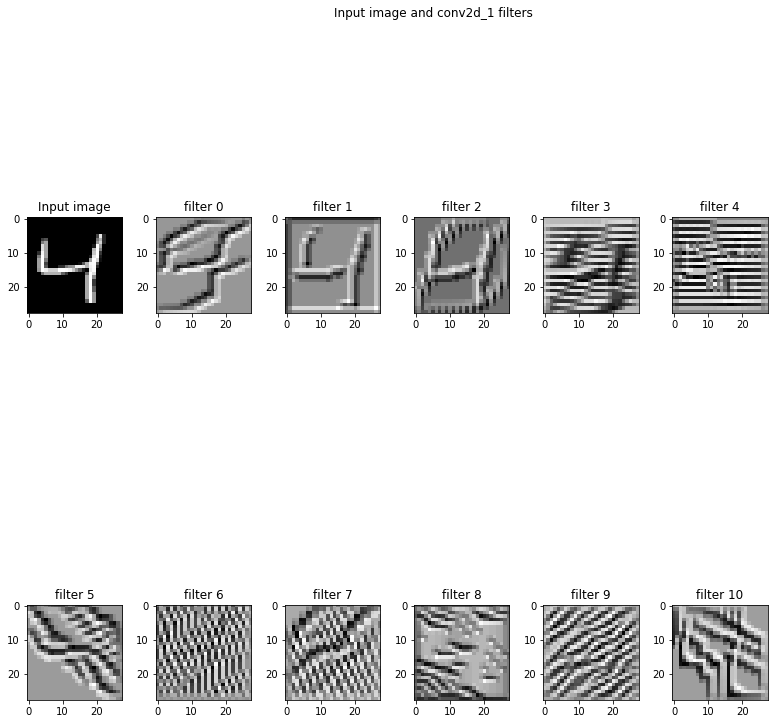

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()